# Task03分享 - 布局格式定方圆

学习内容：https://github.com/datawhalechina/fantastic-matplotlib

通过`plt.subplots()`绘制均匀子图的用法我们已经很熟悉了，接下来的重点放在极坐标和非均匀子图的绘制。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

观察数据在直角坐标系和极坐标系下的表示。

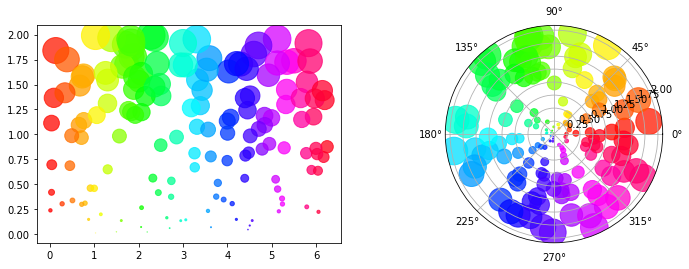

In [2]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121).scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)
fig.add_subplot(122, polar=True).scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

### 使用 `GridSpec` 绘制非均匀子图

所谓非均匀包含两层含义，第一是指图的比例大小不同但没有跨行或跨列，第二是指图为跨列或跨行状态

利用 `add_gridspec` 可以指定相对宽度比例 `width_ratios` 和相对高度比例参数 `height_ratios`。

这两个参数实现对行和列的空间进行一定比例的划分。例如3行2列的图，`height_ratios`就应该是一个长度为3的列表，而`width_ratios`是长度为2的列表。

均匀子图也可以看成是非均匀子图的特殊情况，即 `width_ratios` 和 `height_ratios` 的值全为1。

`add_gridspec()`返回的数组就代表已划分好的各个非均匀区域，利用切片操作可以实现跨行或跨列创建`Axes`，不过这种情况用的比较少。

## 练习

### 1. 墨尔本1981年至1990年的每月温度情况

这题其实是考察pandas，用pandas的`to_datatime()`把第一列转换成日期。

In [3]:
# 添加中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False    

# 读取数据
ex1 = pd.read_csv('data/layout_ex1.csv')

# 将时间列转换成`Datatime`格式
ex1['Time'] = pd.to_datetime(ex1['Time'], format='%Y-%m')

# 将时间列设为索引，方便接下来的切片
ex1 = ex1.set_index('Time', drop=True)

ex1.head()

,Temperature
Time,
1981-01-01,17.712903
1981-02-01,17.678571
1981-03-01,13.500000
1981-04-01,12.356667
1981-05-01,9.490323


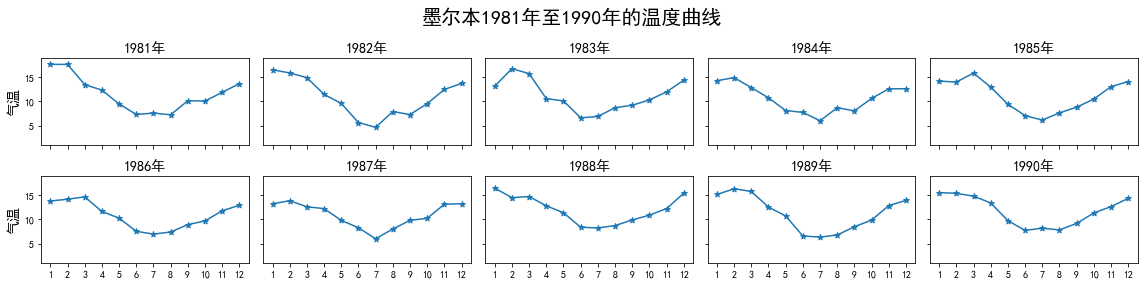

In [4]:
# 创建2*5的绘图空间，并设置标度共享
fig, axes = plt.subplots(2, 5, figsize=(16, 4), sharex=True, sharey=True)
axes = axes.reshape(-1)

# 主循环
for i, year in enumerate(range(1981, 1991)):
    # 一年12月的索引，用于切片
    idx = [f'{year}-{month}' for month in range(1, 13)]

    # 获取x轴和y轴数据
    x_data, y_data = list(range(1, 13)), ex1.loc[idx]['Temperature']

    # 设置小标题
    axes[i].set_title(f'{year}年', size=14)

    # 绘制折线
    axes[i].plot(x_data, y_data)

    # 绘制散点图，并使用星形标记
    axes[i].scatter(x_data, y_data, marker='*')

    # 强制x轴标度为整数
    axes[i].set_xticks(x_data)

    # 设置y轴标度范围
    axes[i].set_ylim(1, 19)

    # 对最左边的子图设置y轴标签
    if i%5==0: axes[i].set_ylabel('气温', size=14)

# 设置大标题
fig.suptitle('墨尔本1981年至1990年的温度曲线', size=20)

# 调整布局
fig.tight_layout()

### 2. 画出数据的散点图和边际分布

- 用 `np.random.randn(2, 150)` 生成一组二维数据，使用两种非均匀子图的分割方法，做出该数据对应的散点图和边际分布图

### 框架构建

先生成数据，并建立2*2的非均匀网格，向其中添加主`Axes`和边际`Axes`。

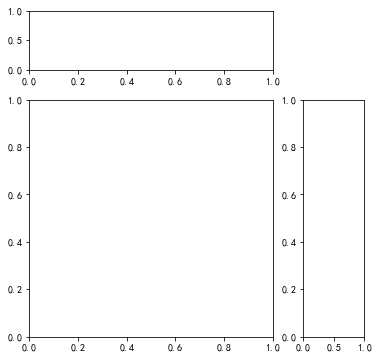

In [5]:
# 生成数据
data = np.random.randn(2, 150)

# 建立2*2的非均匀网格
fig = plt.figure(figsize=(6, 6))
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[6, 1.5], height_ratios=[1.5, 6])

# 添加主Axes
main_axes = fig.add_subplot(spec[1, 0])

# 添加x的边际Axes，与主Axes共享x
xm_axes = fig.add_subplot(spec[0, 0], sharex=main_axes)

# 添加y的边际Axes，与主Axes共享y
ym_axes = fig.add_subplot(spec[1, 1], sharey=main_axes)

### 绘制主`Axes`

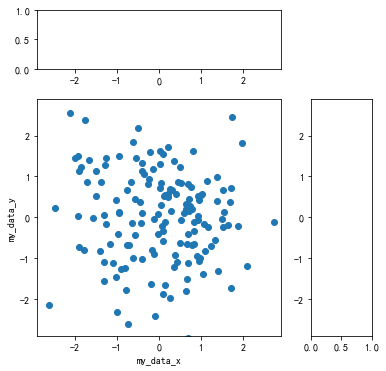

In [6]:
# 设置坐标轴标签
main_axes.set_xlabel('my_data_x')
main_axes.set_ylabel('my_data_y')

# 固定坐标轴范围
main_axes.set_xlim(-2.9, 2.9)
main_axes.set_ylim(-2.9, 2.9)

# 绘制散点图
main_axes.scatter(*data)
fig

### 绘制边际`Axes`

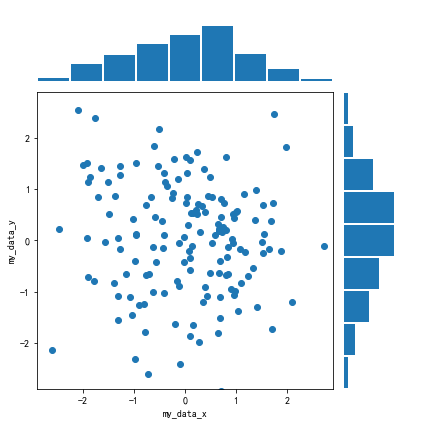

In [7]:
# 使用直方图统计点数
xm_axes.hist(data[0, :], bins=np.linspace(-2.9, 2.9, 10), rwidth=0.94)

# 设置y轴范围
xm_axes.set_ylim(0, 50)

# 隐藏x轴标度
xm_axes.get_xaxis().set_visible(False)

# 隐藏y轴标度
xm_axes.get_yaxis().set_visible(False)

# 关闭边框
for spine in xm_axes.spines.values():
    spine.set_visible(False)

# 下面用同样的方法绘制y
ym_axes.hist(data[1, :], bins=np.linspace(-2.9, 2.9, 10), rwidth=0.94, orientation='horizontal')
ym_axes.set_xlim(0, 50)
ym_axes.get_xaxis().set_visible(False)
ym_axes.get_yaxis().set_visible(False)

for spine in ym_axes.spines.values():
    spine.set_visible(False)

# 调整布局
fig.tight_layout()
fig

经过几天的学习，可以感受到技能慢慢变得熟练了~